In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
     

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
     

df = pd.read_csv(r'G:\Project\PRODIGY_ML\K_MEANS\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.shape

(200, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.duplicated().sum()

0

In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Figure size 1600x1000 with 0 Axes>

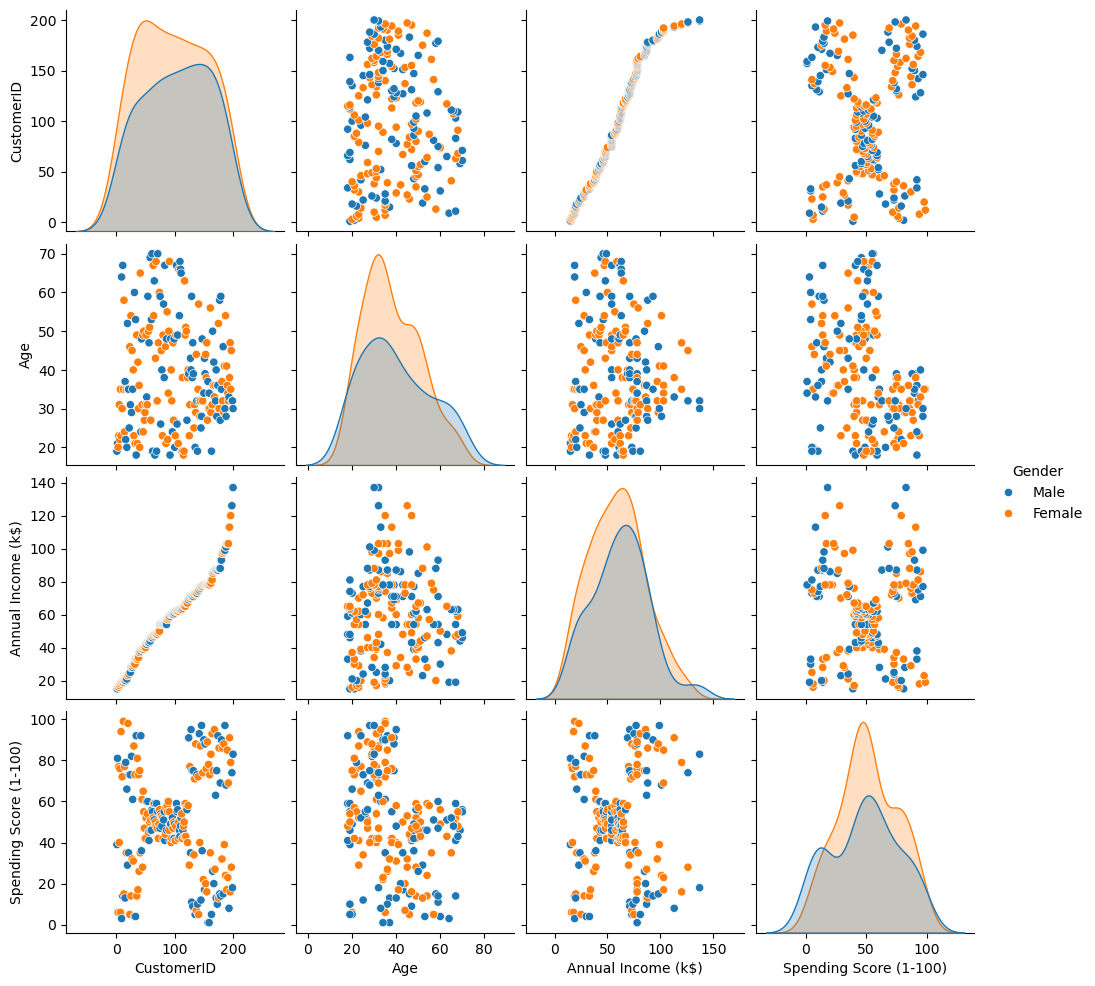

In [26]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

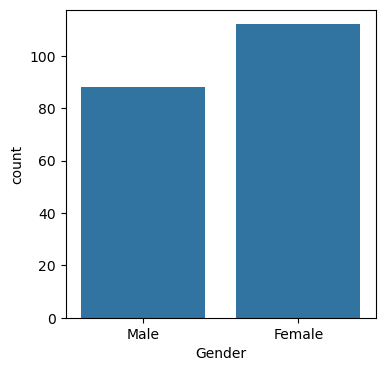

In [28]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5916\2252987099.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_5916\2252987099.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_591

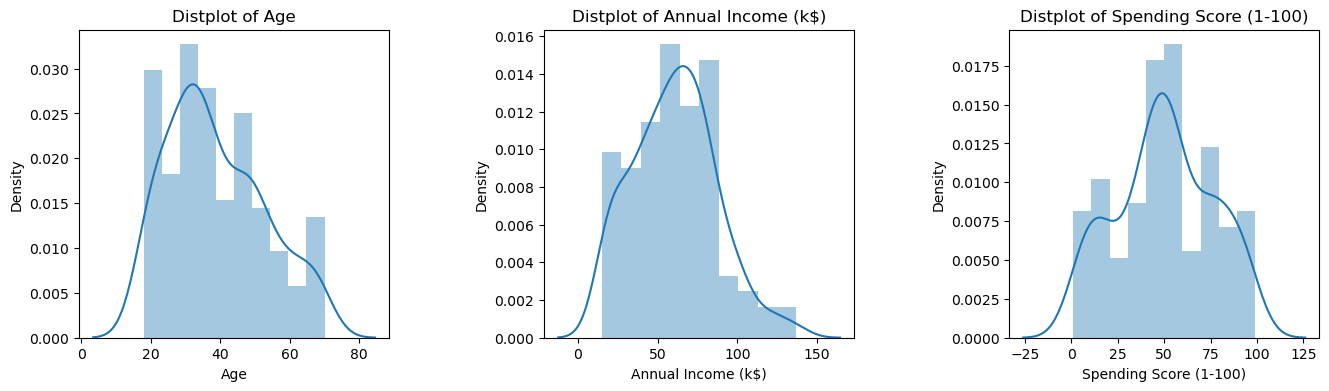

In [30]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

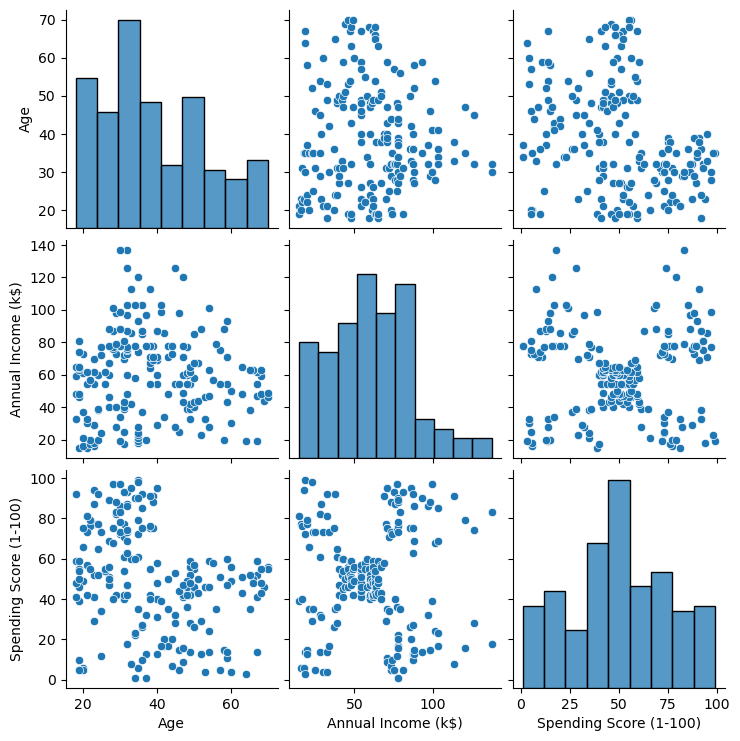

In [32]:

sns.pairplot(df[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

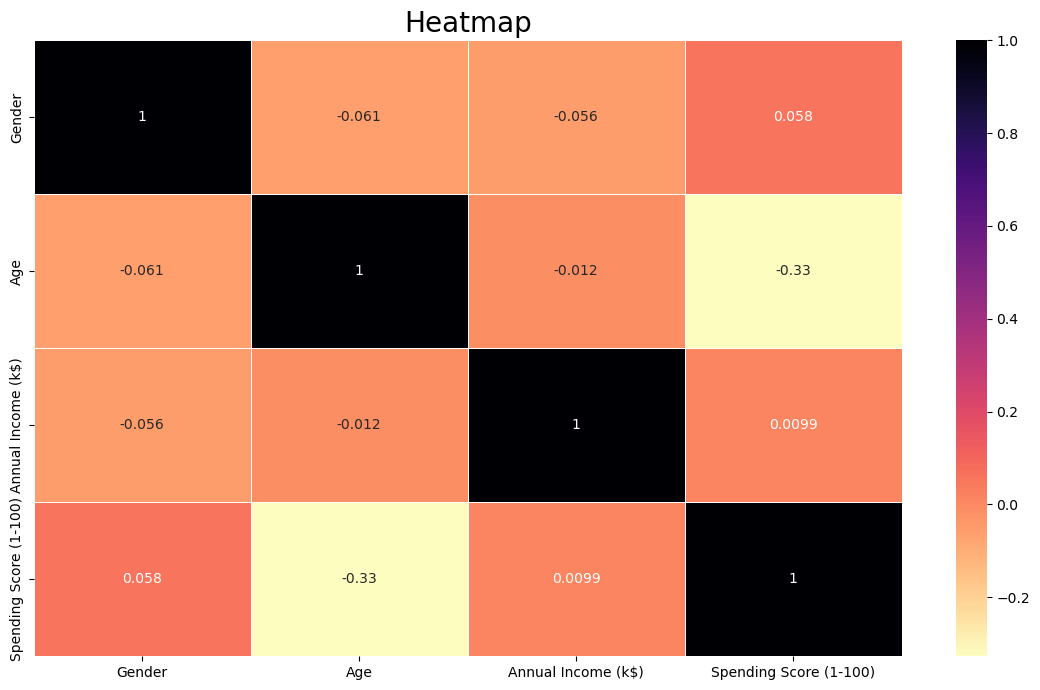

In [34]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Gender' to numeric values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Generate the heatmap
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),
            cmap='magma_r', annot=True, linewidths=.5)
plt.title('Heatmap', fontsize=20)
plt.show()

Text(30.636728395061724, 0.5, 'Spending Score (1-100)')

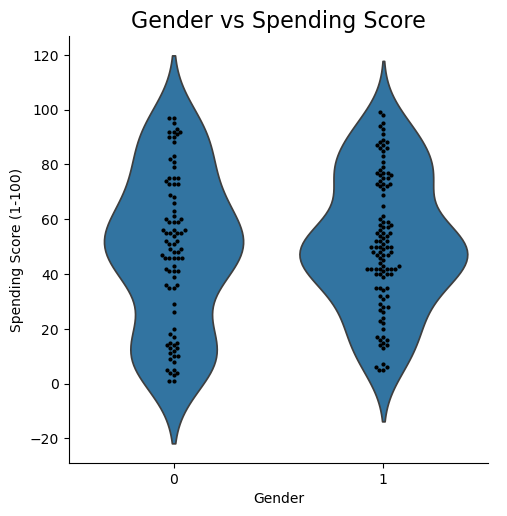

In [36]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="Spending Score (1-100)", kind="violin", inner=None, data=df)
sns.swarmplot(x="Gender", y="Spending Score (1-100)", color="k", size=3, data=df, ax=g.ax);
plt.title('Gender vs Spending Score', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')

Text(30.575617283950628, 0.5, 'Annual Income (k$)')

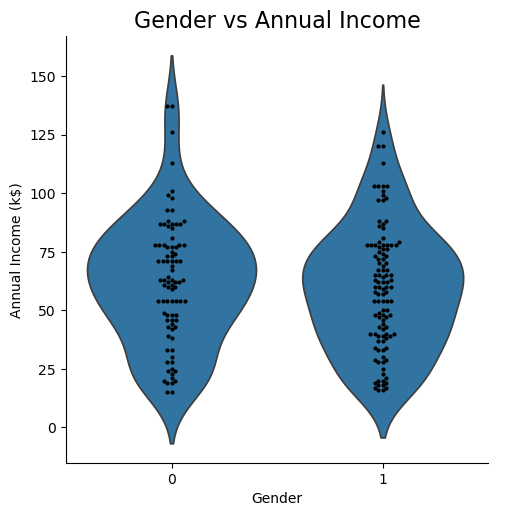

In [38]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Gender", y="Annual Income (k$)", kind="violin", inner=None, data=df)
sns.swarmplot(x="Gender", y="Annual Income (k$)", color="k", size=3, data=df, ax=g.ax);
plt.title('Gender vs Annual Income', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')

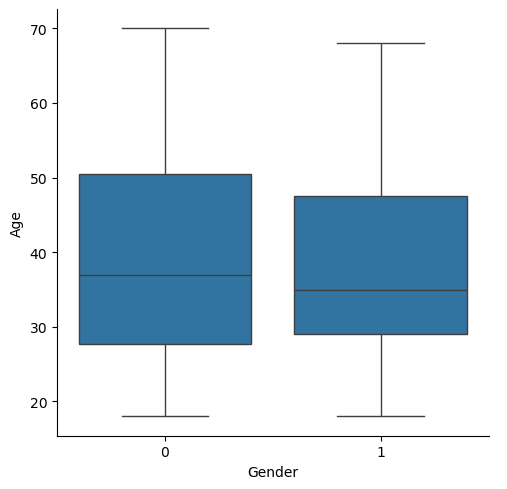

In [40]:
sns.catplot(x="Gender", y="Age", kind="box", data=df);

In [44]:
X = df.iloc[:, -2:]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

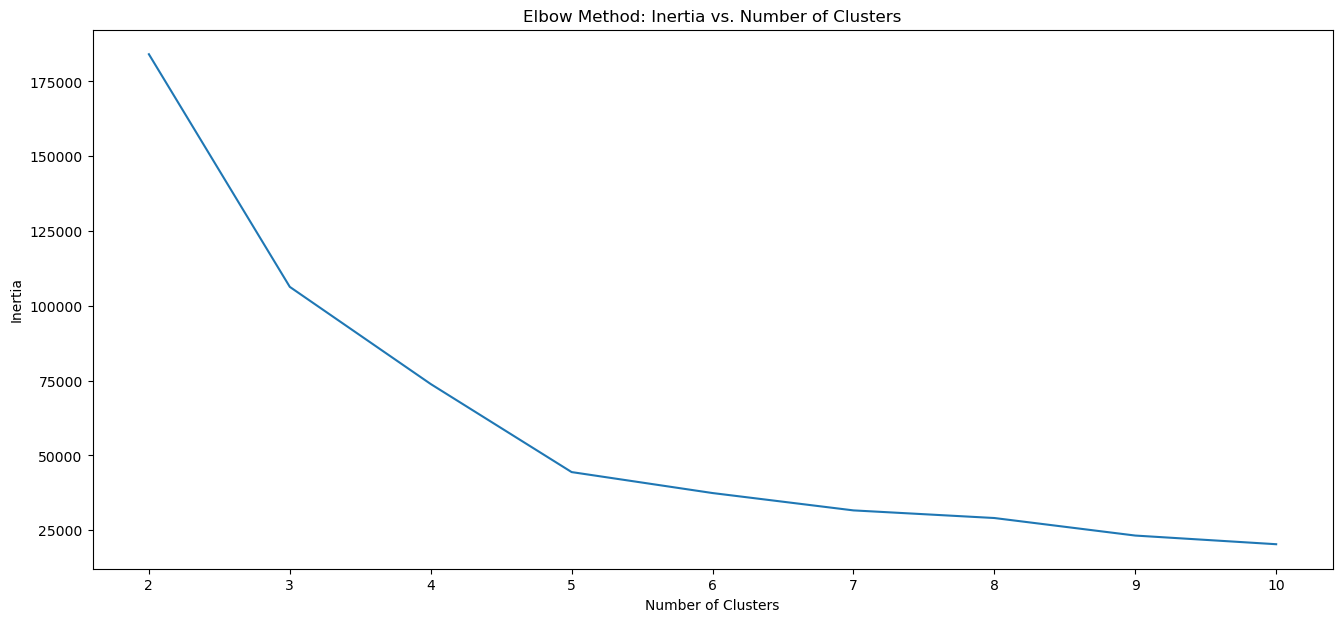

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is defined and contains your data

km_inertias = []
km_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

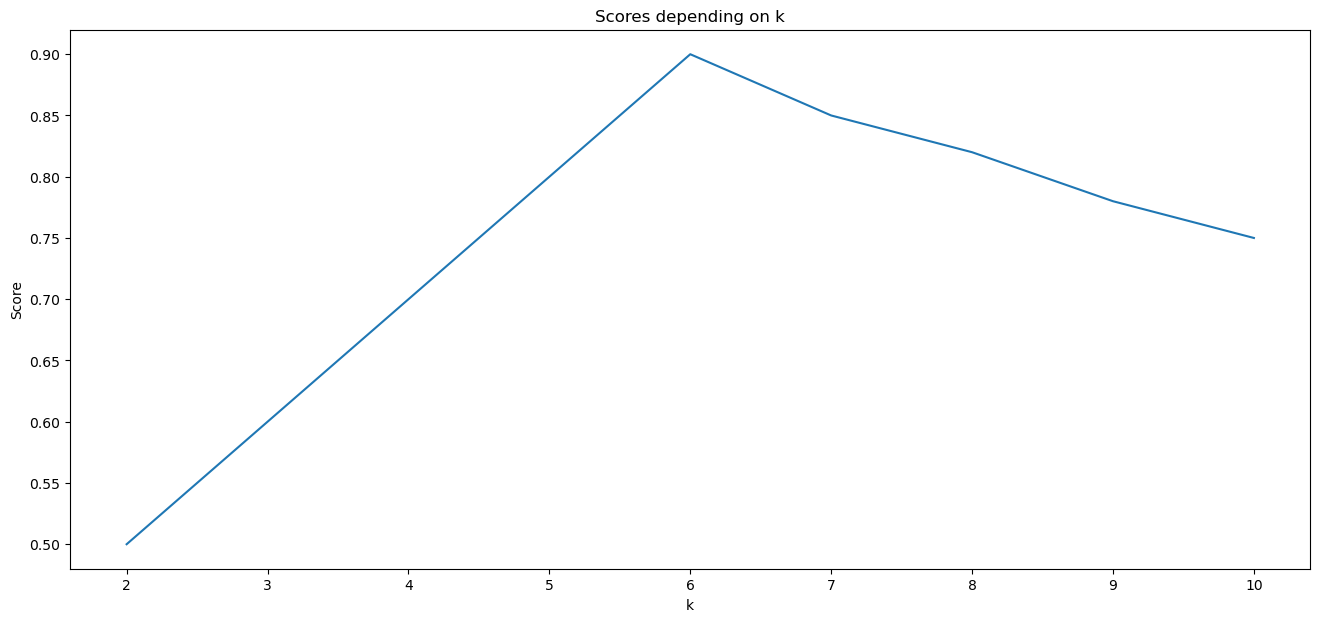

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data for demonstration purposes
km_scores = [0.5, 0.6, 0.7, 0.8, 0.9, 0.85, 0.82, 0.78, 0.75]

sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('Scores depending on k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [50]:
X = df.iloc[:, -3:]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

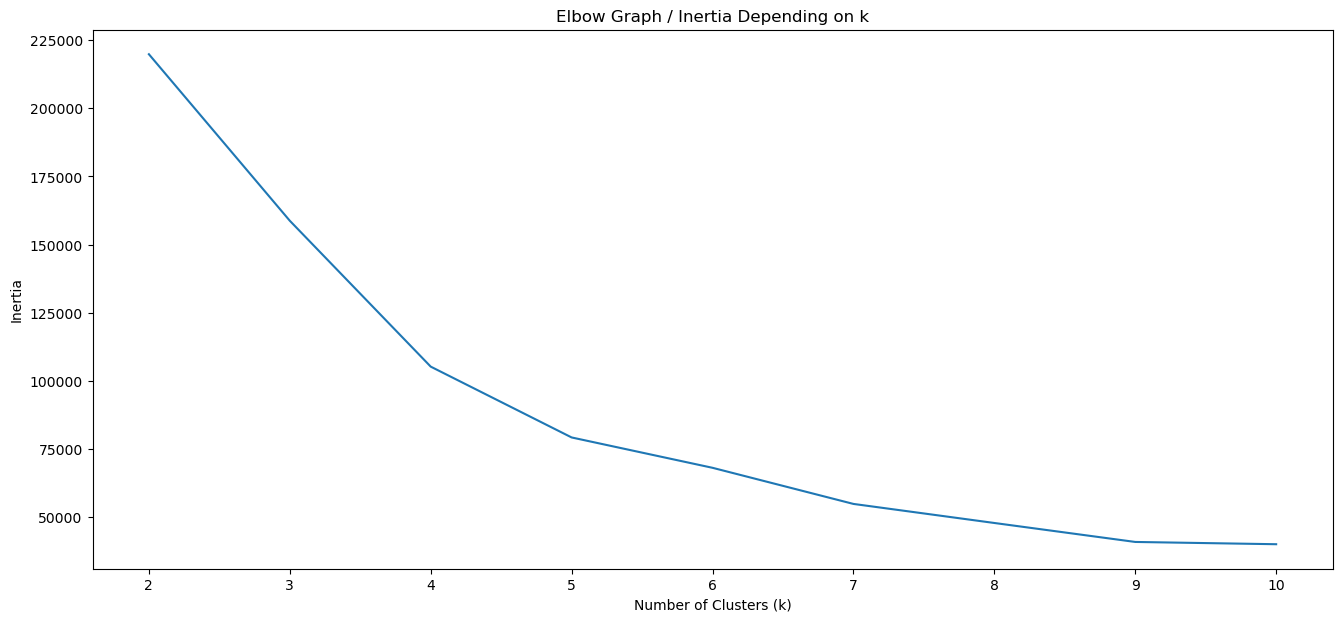

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming km_inertias and km_scores are defined as lists
# and X is your data for KMeans clustering

km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('Elbow Graph / Inertia Depending on k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

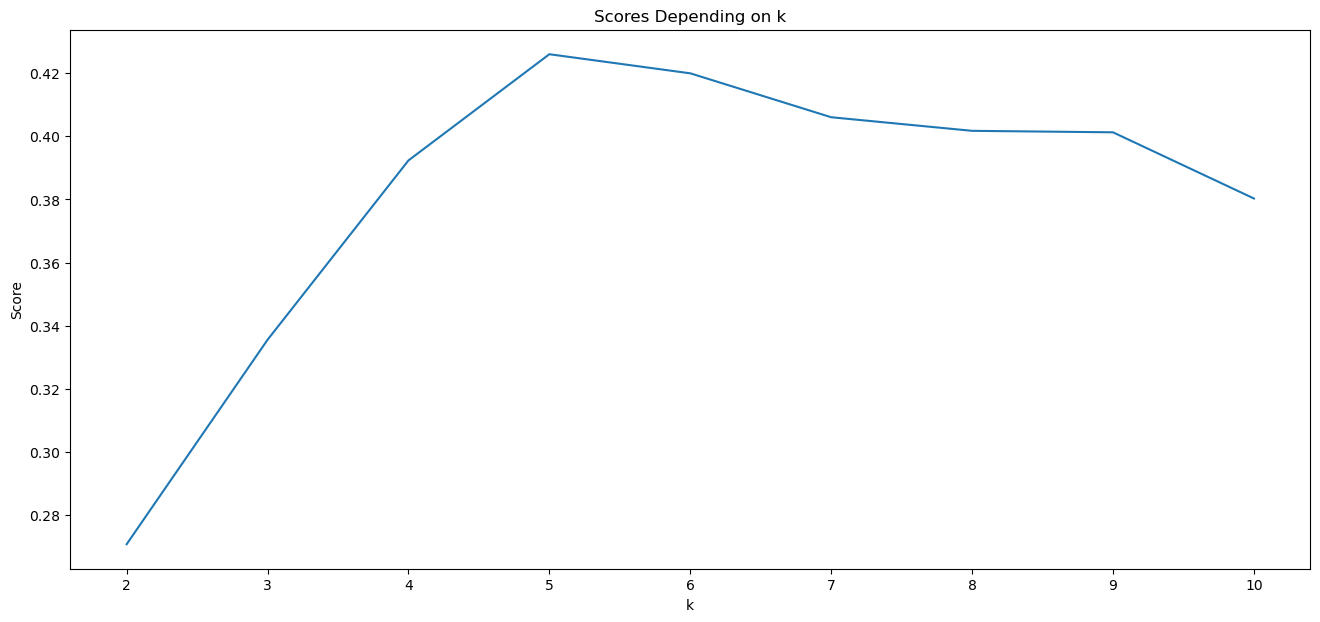

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming km_scores is defined somewhere in your code
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('Scores Depending on k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [56]:
km = KMeans(n_clusters=5).fit(X)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


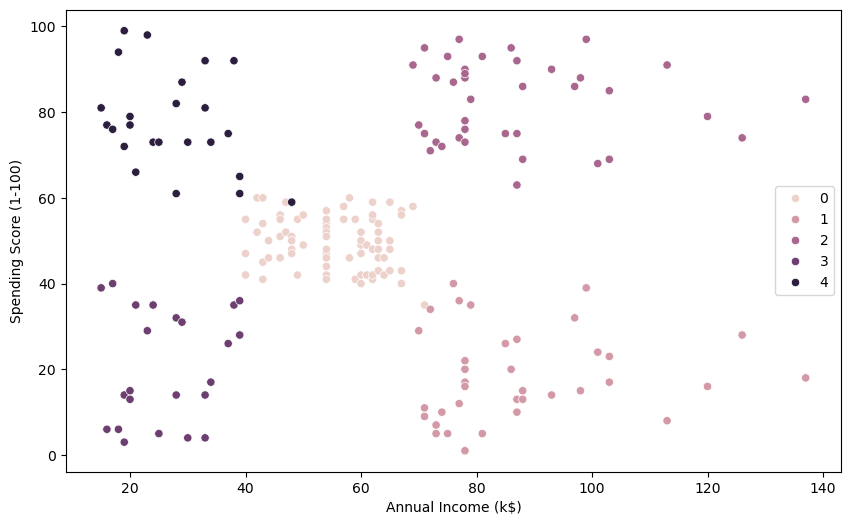

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your DataFrame and km.labels_ contains cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x=X.columns[1], y=X.columns[2], hue=km.labels_)
plt.show()

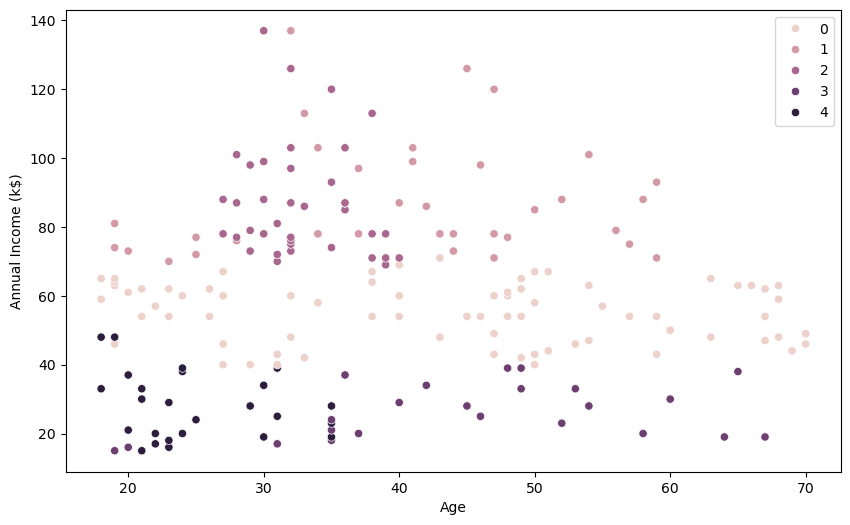

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your DataFrame and km.labels_ contains cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x=X.columns[0], y=X.columns[1], hue=km.labels_)
plt.show()

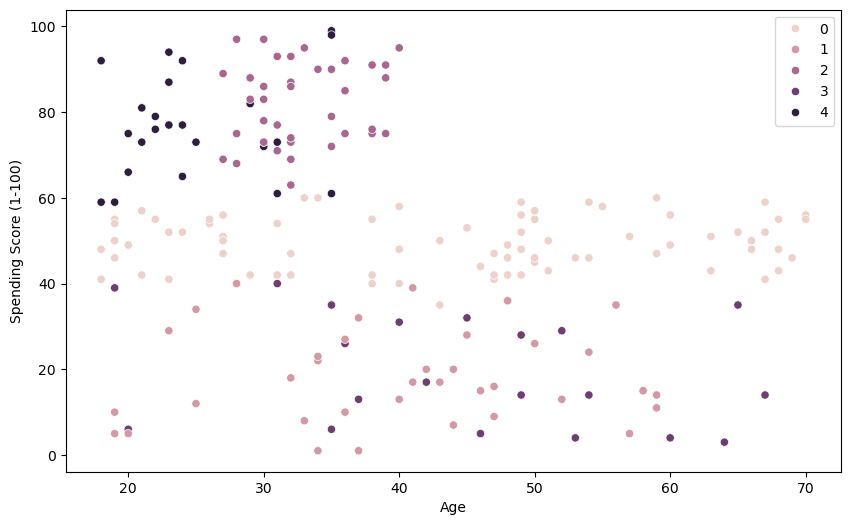

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your DataFrame and km.labels_ contains cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x=X.columns[0], y=X.columns[2], hue=km.labels_)
plt.show()

In [64]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

<Figure size 800x800 with 0 Axes>

In [66]:
X['label'] = km.labels_

In [68]:
X.label.value_counts()

label
0    76
2    39
1    37
4    25
3    23
Name: count, dtype: int64

In [70]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  76.000000           76.000000               76.000000
mean   43.934211           55.210526               49.447368
min    18.000000           40.000000               35.000000
max    70.000000           71.000000               60.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  37.000000           37.000000               37.000000
mean   40.324324           87.432432               18.189189
min    19.000000           70.000000                1.000000
max    59.000000          137.000000               40.000000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



cluster nb : 3
             Age

In [74]:

X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,37.000000,37.000000,37.000000
mean,40.324324,87.432432,18.189189
min,19.000000,70.000000,1.000000
max,59.000000,137.000000,40.000000
